##  “良/恶性乳腺癌肿瘤预测”样例

In [1]:
%matplotlib inline
#导入工具包
import numpy as np
import pandas as pd
#导入matolotlib工具包的pyplot并简化命名为plt
import matplotlib.pyplot as plt
#导入sklearn中的逻辑新蒂回归分类器
from sklearn.linear_model import LogisticRegression 

In [2]:
#导入训练集和测试集
df_train=pd.read_csv('/mnt/c/myDoc/Datasets/Breast-Cancer/breast-cancer-train.csv') 
df_test=pd.read_csv('/mnt/c/myDoc/Datasets/Breast-Cancer/breast-cancer-test.csv')

In [3]:
#选取‘Clump Thickness’和‘Cell Size’作为特征，构建测试集中的正负分类样本
df_test_negative=df_test.loc[df_test['Type']==0][['Clump Thickness','Cell Size']]
df_test_positive=df_test.loc[df_test['Type']==1][['Clump Thickness','Cell Size']]

Text(0,0.5,u'Cell Size')

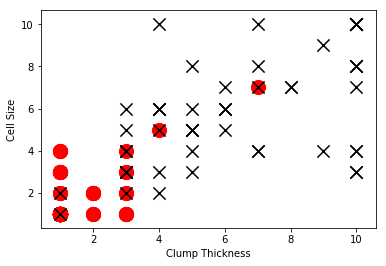

In [4]:
#绘制良性肿瘤样本点，标记为红色o
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'],marker='o',s=200,c='red')
#绘制恶性肿瘤样本点，标记为黑色x
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'],marker='x',s=150,c='black')
#绘制x,y轴的说明
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

Text(0,0.5,u'Cell Size')

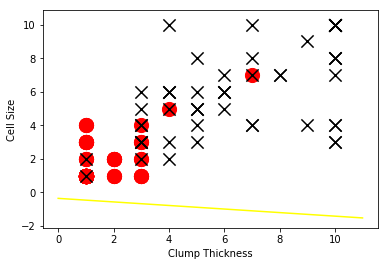

In [5]:
#利用numpy工具包中的radom函数随机采样直线的截距和系数
intercept=np.random.random([1])
coef=np.random.random([2])
lx=np.arange(0,12)
ly=(- intercept - lx * coef[0] / coef[1])
#绘制一条随机直线
plt.plot(lx, ly, c="yellow")
plt.scatter(df_test_negative["Clump Thickness"],df_test_negative['Cell Size'],marker='o',s=200,c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

In [6]:
lr=LogisticRegression()
#使用前10条训练样本学习直线的系数和截距
lr.fit(df_train[['Clump Thickness','Cell Size']][:10],df_train['Type'][:10])
print 'Testing accuracy(10 training samples):',lr.score(df_test[['Clump Thickness','Cell Size']],df_test['Type'])

Testing accuracy(10 training samples): 0.8685714285714285


Text(0,0.5,u'Cell Size')

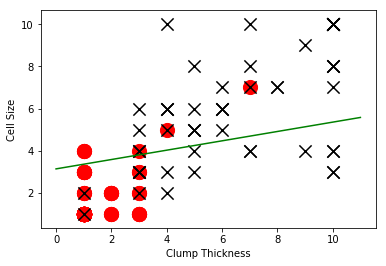

In [7]:
intercept=lr.intercept_
coef=lr.coef_[0,:]
ly=(-intercept-lx*coef[0])/coef[1]
plt.plot(lx,ly,c='green')
plt.scatter(df_test_negative["Clump Thickness"],df_test_negative['Cell Size'],marker='o',s=200,c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

In [8]:
lr=LogisticRegression()
#使用所用的训练样本学习直线的系数和截距
lr.fit(df_train[['Clump Thickness','Cell Size']],df_train['Type'])
print 'Testing accuracy(all training samples):',lr.score(df_test[['Clump Thickness','Cell Size']],df_test['Type'])

Testing accuracy(all training samples): 0.9371428571428572


Text(0,0.5,u'Cell Size')

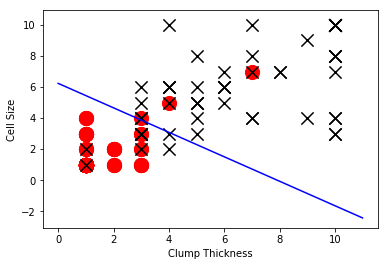

In [9]:
intercept=lr.intercept_
coef=lr.coef_[0,:]
ly=(-intercept-lx*coef[0])/coef[1]
plt.plot(lx,ly,c='blue')
plt.scatter(df_test_negative["Clump Thickness"],df_test_negative['Cell Size'],marker='o',s=200,c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')